**Machine Learning CSE-6363 HOMEWORK - 2**

QNS: Use PCA and ICA for extracting features on Labeled Faces in the Wild (LFW) people dataset
1. Applying PCA to extract the eigenfaces of the dataset
2. Representing the data using eigenfaces (transforming the data)
3. Using SVM to classify the transformed data
4. Try different parameters for PCA
5. Repeat the above, but change PCA to ICA.

Team - 10 : Team Members: 

---
Karthik Babu Vadloori (1002064678)

---
Mayukha Thumiki (1002055616)

---
Jayadev Mandava (1002062733)

---
Bhuvaneswari Yendluru (1002081299)

---
Chandrahas Guttikonda (1002049825)


References

######https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html

######https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_vs_pca.html

######https://scikit-learn.org/stable/modules/decomposition.html#decompositions

######https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html

######https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

######https://towardsdatascience.com/using-principal-component-analysis-pca-for-machine-learning-b6e803f5bf1e

###Importing libraries

In [ ]:
from time import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform

###Understanding the dataset

In [ ]:
#Fetching the dataset using in-built method
lfw_people = fetch_lfw_people(min_faces_per_person=200, resize=0.4)

In [ ]:
#Printing the dataset
lfw_people

{'data': array([[106.333336,  92.333336,  84.333336, ...,  95.666664,  87.      ,
          74.333336],
        [117.666664, 172.33333 , 189.33333 , ..., 171.      , 169.      ,
         163.33333 ],
        [126.333336, 143.66667 , 151.      , ...,  66.666664,  72.      ,
          37.333332],
        ...,
        [ 94.666664,  83.333336,  79.666664, ...,   8.333333,   7.      ,
           8.333333],
        [152.      , 143.      , 134.      , ...,  15.      ,  17.333334,
          22.333334],
        [ 91.333336,  97.      , 102.      , ...,  30.333334,  30.      ,
          43.      ]], dtype=float32),
 'images': array([[[106.333336,  92.333336,  84.333336, ...,  61.333332,
           94.666664, 145.33333 ],
         [100.333336,  86.666664,  89.333336, ...,  75.333336,
           77.      , 127.333336],
         [105.333336,  93.666664,  96.      , ..., 107.666664,
           68.      ,  97.666664],
         ...,
         [148.      , 133.66667 , 118.      , ..., 137.      ,
     

In [ ]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape 

# for machine learning we use the 2 data directly 
#(as relative pixel positions info is ignored by this model)
X = lfw_people.data
a_dimensions = X.shape
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Description of the dataset:")
print("Dimensions of the array: %s" % (a_dimensions,))
print("Number of samples: %d" % n_samples)
print("Number of features: %d" % n_features)
print("Number of classes: %d" % n_classes)
print("Labels: %s" % target_names)

Description of the dataset:
Dimensions of the array: (766, 1850)
Number of samples: 766
Number of features: 1850
Number of classes: 2
Labels: ['Colin Powell' 'George W Bush']


In [ ]:
#Number of occurences of each label
#0 for Colin Powell and 1 for George W Bush
print("Number of occurences of Colin Powell and George W Bush")
print(np.array(np.unique(y, return_counts=True))) 


Number of occurences of Colin Powell and George W Bush
[[  0   1]
 [236 530]]


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


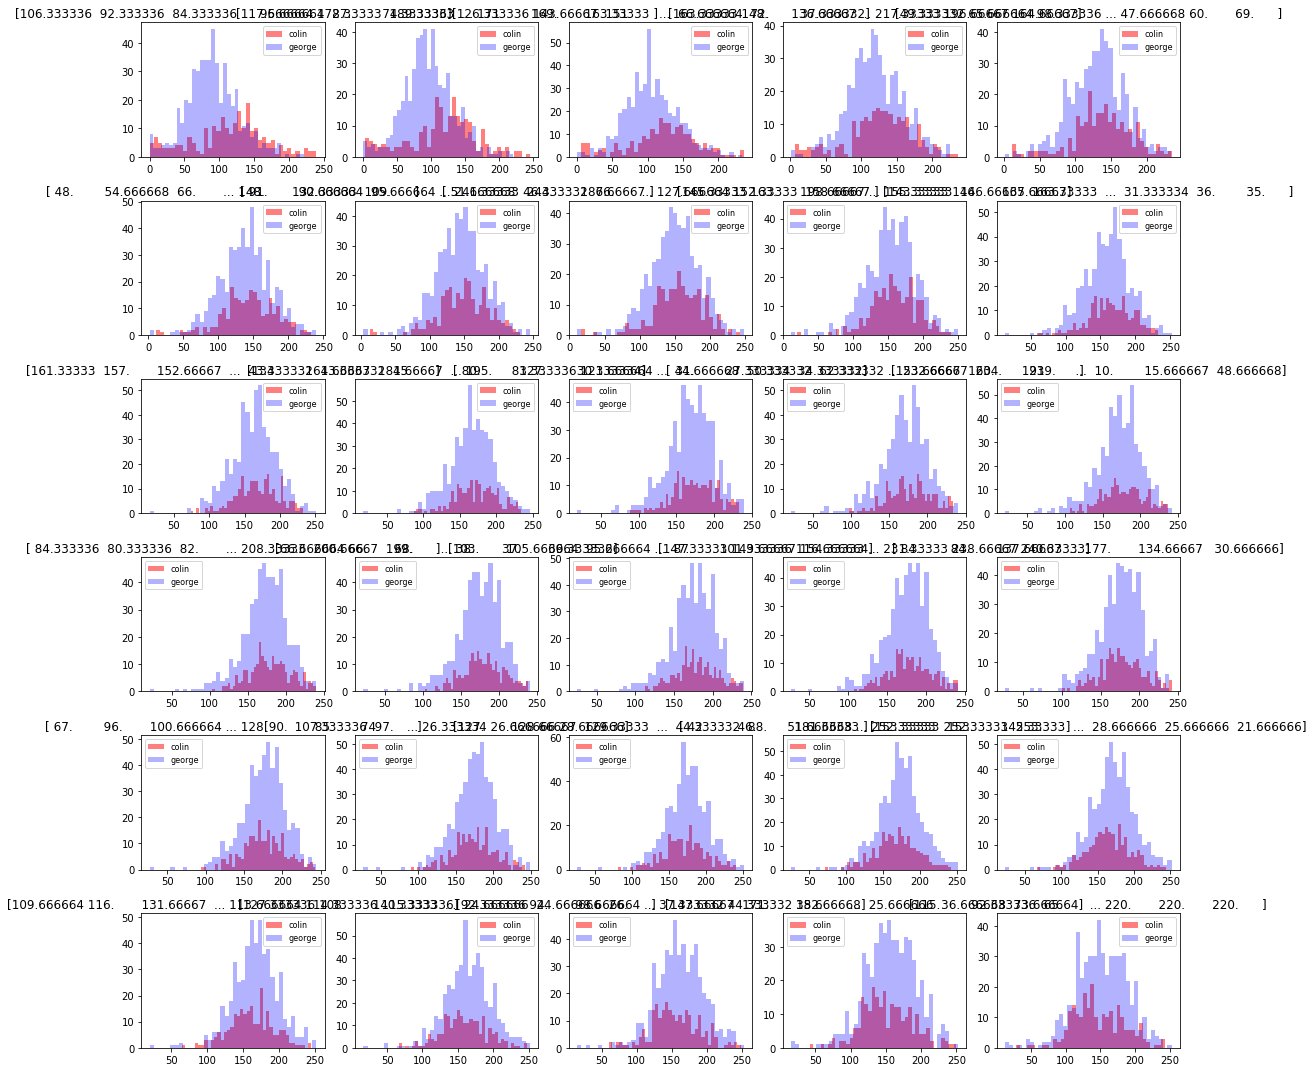

In [ ]:
#Plotting graph for features of each of the two classes upto 30 features
temp, axis = plt.subplots(6,5, figsize=(15, 15))
colin = lfw_people.data[lfw_people.target==0]
george = lfw_people.data[lfw_people.target==1]
ax_array = axis.ravel()   #Flattening the 2D array
for i in range(30):                   
    bins = 40
    ax_array[i].hist(colin[:,i], bins=bins, color='r', alpha=.5)  #Plotting histogram for each feature 
    ax_array[i].hist(george[:,i], bins=bins, color='b', alpha=0.3) 
    ax_array[i].set_title(lfw_people.data[i], fontsize=12)  #Setting title for the plot
    ax_array[i].legend(['colin','george'], loc='best', fontsize=8)  #Displaying the legend
    
plt.tight_layout()
plt.show()


In [ ]:
#Splitting the dataset into 70% train data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

In [ ]:
#Standardizing the data using StandardScaler() method
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###PCA

In [ ]:
n_components = 150

In [ ]:
#Feature extraction or dimensionality reduction using PCA with parameter svd_solver="randomized" 

def pca_randomized_svd_solver():
    print(
        "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
    )
    start_time_t0 = time()
    pca = PCA(n_components=n_comiponents, copy=True, whiten=True, svd_solver="randomized", 
              iterated_power='auto', random_state=None).fit(X_train)
    
    print("done in %0.3fs" % (time() - start_time_t0))
    
    eigenfaces = pca.components_.reshape((n_components, h, w))
    
    print("Projecting the input data on the eigenfaces orthonormal basis")
    start_time_t1 = time()
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print("done in %0.3fs" % (time() - start_time_t1))

In [ ]:
#Repeating the above procedure of dimensionality reduction using PCA with parameter svd_solver="full"

def pca_full_svd_solver():
    print(
        "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
    )
    start_time_t0 = time()
    pca = PCA(n_components=n_components, copy=True, whiten='unit-variance', svd_solver="full", iterated_power='auto', random_state=0).fit(X_train)
    
    print("done in %0.3fs" % (time() - start_time_t0))
    
    eigenfaces = pca.components_.reshape((n_components, h, w))
    
    print("Projecting the input data on the eigenfaces orthonormal basis")
    start_time_t1 = time()
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print("done in %0.3fs" % (time() - start_time_t1))

In [ ]:
#Dimensionality reduction using PCA with parameter svd_solver="arpack"

def pca_arpack_svd_solver():
    print(
        "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
    )
    start_time_t0 = time()
    pca = PCA(n_components=n_components, copy=True, whiten='random', svd_solver="arpack", iterated_power='auto', random_state=42).fit(X_train)
    print("done in %0.3fs" % (time() - start_time_t0))
    
    eigenfaces = pca.components_.reshape((n_components, h, w))
    
    print("Projecting the input data on the eigenfaces orthonormal basis")
    start_time_t1 = time()
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print("done in %0.3fs" % (time() - start_time_t1))

In [ ]:
#Dimensionality reduction using PCA with parameter svd_solver="auto"

def pca_auto_svd_solver():
    print(
        "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
    )
    start_time_t0 = time()
    pca = PCA(n_components=n_components, copy=True, whiten=True, svd_solver="auto", iterated_power='auto', random_state=None).fit(X_train)
    
    print("done in %0.3fs" % (time() - start_time_t0))
    
    eigenfaces = pca.components_.reshape((n_components, h, w))
    
    print("Projecting the input data on the eigenfaces orthonormal basis")
    start_time_t1 = time()
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print("done in %0.3fs" % (time() - start_time_t1))

In [ ]:
print("Dimensionality reduction using PCA with parameter svd_solver='randomized'a ")
pca_full_svd_solver()

print("\nDimensionality reduction using PCA with parameter svd_solver='full' ")
pca_full_svd_solver()

print("\nDimensionality reduction using PCA with parameter svd_solver='arpack' ")
pca_arpack_svd_solver()

print("\nDimensionality reduction using PCA with parameter svd_solver='auto ")
pca_auto_svd_solver()

Dimensionality reduction using PCA with parameter svd_solver='randomized'a 
Extracting the top 150 eigenfaces from 536 faces
done in 0.271s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.013s

Dimensionality reduction using PCA with parameter svd_solver='full' 
Extracting the top 150 eigenfaces from 536 faces
done in 0.343s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.025s

Dimensionality reduction using PCA with parameter svd_solver='arpack' 
Extracting the top 150 eigenfaces from 536 faces
done in 0.362s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.023s

Dimensionality reduction using PCA with parameter svd_solver='auto 
Extracting the top 150 eigenfaces from 536 faces
done in 0.308s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.025s


In [ ]:
pca = PCA(n_components=n_components, copy=True, whiten='auto', svd_solver="randomized", iterated_power='auto', random_state=None).fit(X_train)
#pca = PCA(n_components=n_components, copy=True, whiten='unit-variance', svd_solver="full", iterated_power='auto', random_state=None).fit(X_train)
#pca = PCA(n_components=n_components, copy=True, whiten='random', svd_solver="arpack", iterated_power='auto', random_state=None).fit(X_train)
#pca = PCA(n_components=n_components, copy=True, whiten='auto', svd_solver="auto", iterated_power='auto', random_state=None).fit(X_train)


In [ ]:
#Principle components of the dataset      
pca_components = abs(pca.components_)
print(pca_components)

[[0.00944794 0.00984032 0.01139295 ... 0.00120365 0.00169106 0.00054132]
 [0.0142295  0.01432685 0.01728145 ... 0.01102285 0.00975882 0.00995992]
 [0.03380391 0.03655955 0.03955395 ... 0.00287032 0.00554498 0.00621676]
 ...
 [0.032072   0.0047389  0.02347348 ... 0.03962278 0.00884562 0.05878087]
 [0.01449693 0.00674666 0.01005139 ... 0.03377259 0.00422972 0.01799355]
 [0.00340775 0.0063388  0.0007973  ... 0.01675866 0.01979175 0.01336427]]


In [ ]:
#Cumulative explained variance
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)

Cumulative Variances (Percentage):
[23.110243 40.668324 47.894268 53.38405  57.028084 60.0766   62.30787
 64.2387   65.990685 67.51991  68.91674  70.286354 71.47248  72.571785
 73.54414  74.44111  75.274925 76.054985 76.73588  77.40394  78.00242
 78.58169  79.091484 79.59884  80.08405  80.53391  80.97789  81.409485
 81.824425 82.23342  82.617485 82.96442  83.30851  83.64084  83.96723
 84.28258  84.59507  84.88927  85.17561  85.45317  85.71695  85.971085
 86.2236   86.467865 86.706245 86.93871  87.166145 87.38712  87.60495
 87.818306 88.02191  88.224434 88.42339  88.61997  88.8028   88.98364
 89.16202  89.33494  89.4993   89.660385 89.81734  89.9709   90.121994
 90.272484 90.41883  90.56214  90.70049  90.836784 90.97188  91.104675
 91.23343  91.36017  91.48546  91.606346 91.72495  91.84182  91.957054
 92.06922  92.17909  92.28756  92.39411  92.49949  92.601135 92.70053
 92.79868  92.89648  92.99287  93.087524 93.18087  93.27235  93.36084
 93.4486   93.53605  93.62196  93.70372  93.78457

Text(0, 0.5, 'Cumulative explained variance')

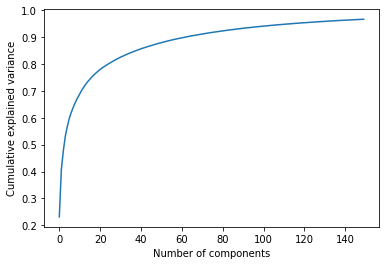

In [ ]:
#Graphical representation of cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

####Model training

In [ ]:
X_train_pca = pca.transform(X_train)
print("Fitting the classifier to the training set")
start_time_t2 = time()
grid_parameters = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), grid_parameters, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - start_time_t2))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 1.285s
Best estimator found by grid search:
SVC(C=2023.8653184131072, class_weight='balanced', gamma=0.00402149871252647)


done in 0.046s
               precision    recall  f1-score   support

 Colin Powell       0.95      0.87      0.91        71
George W Bush       0.95      0.98      0.96       159

     accuracy                           0.95       230
    macro avg       0.95      0.93      0.94       230
 weighted avg       0.95      0.95      0.95       230



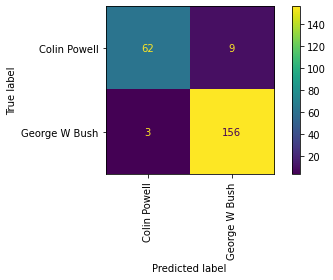

In [ ]:
start_time_t3 = time()
X_test_pca = pca.transform(X_test)
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - start_time_t3))

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical")
plt.tight_layout()
plt.show()

In [ ]:
#Helper function to plot a gallery of portraits
def portraits_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure(figsize=(1.8 * cols, 2.4 * rows))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

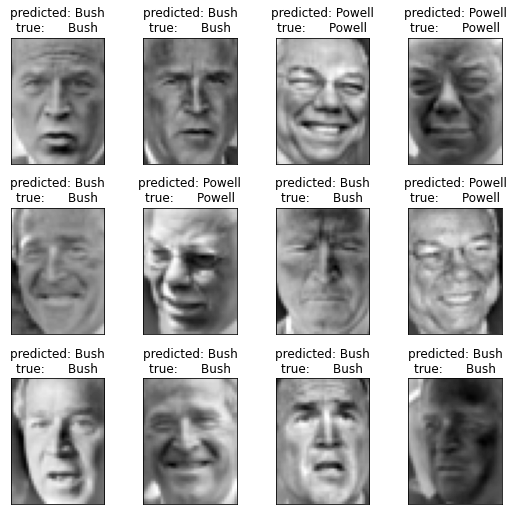

In [ ]:
def pred_title(pred, test, tn, i):
    predicted_name = tn[pred[i]].rsplit(" ", 1)[-1]
    actual_name = tn[test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (predicted_name, actual_name)


prediction_titles = [
    pred_title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

portraits_gallery(X_test, prediction_titles, h, w)

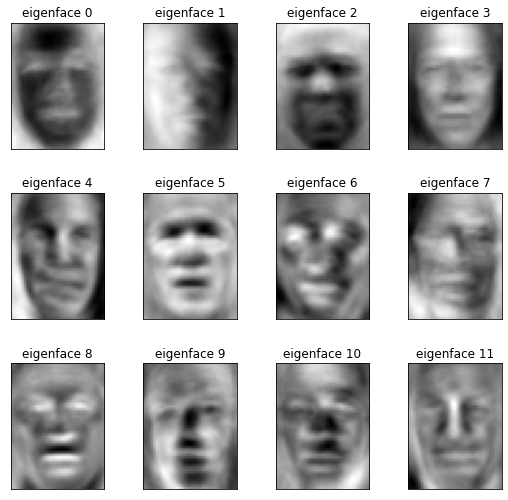

In [ ]:
#Outputting extracted Eigen Faces
eigenfaces = pca.components_.reshape((n_components, h, w))
eigen_face_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
portraits_gallery(eigenfaces, eigen_face_titles, h, w)

plt.show()

###ICA

In [ ]:
#Dimensionality reduction using ICA with parameters whiten = True, fun = "logcosh"

def fastICA_logcosh_fun():
    print(
        "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
    )
    start_time_t4 = time()
    ica_transformer = FastICA(n_components=n_components, whiten = True, fun = "logcosh",  max_iter=200, random_state = None)
    ica = ica_transformer.fit(X_train)
    X_train_ica = ica.transform(X_train)
    X_test_ica = ica.transform(X_test)
    print("done in %0.3fs" % (time() - start_time_t4))


In [ ]:
#Repeating dimensionality reduction using ICA with parameters whiten = 'unit-variance', fun = "exp"

def fastICA_exp_fun():
    print(
        "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
    )
    start_time_t4 = time()
    
    ica = FastICA(n_components=n_components, whiten = 'unit-variance', fun = "exp",  max_iter=100, random_state = 42).fit(X_train)
    X_train_ica = ica.transform(X_train)
    X_test_ica = ica.transform(X_test)
    print("done in %0.3fs" % (time() - start_time_t4))

In [ ]:
#Dimensionality reduction using ICA with parameters whiten = 'random', fun = "cube"

def fastICA_cube_fun():
    print(
        "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
    )
    start_time_t4 = time()
    
    ica = FastICA(n_components=n_components, whiten = 'random', fun = "cube",  max_iter=100, random_state = None).fit(X_train)
    X_train_ica = ica.transform(X_train)
    X_test_ica = ica.transform(X_test)
    print("done in %0.3fs" % (time() - start_time_t4))

In [ ]:
print("Dimensionality reduction using ICA with parameters whiten = True, fun = 'logcosh' ")
fastICA_logcosh_fun()
print("\nDimensionality reduction using ICA with parameters whiten = 'unit-variance', fun = 'exp' ")
fastICA_exp_fun()
print("\nDimensionality reduction using ICA with parameters whiten = 'random', fun = 'cube' ")
fastICA_cube_fun()

Dimensionality reduction using ICA with parameters whiten = True, fun = 'logcosh' 
Extracting the top 150 eigenfaces from 536 faces
done in 3.852s

Dimensionality reduction using ICA with parameters whiten = 'unit-variance', fun = 'exp' 
Extracting the top 150 eigenfaces from 536 faces


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


done in 1.668s

Dimensionality reduction using ICA with parameters whiten = 'random', fun = 'cube' 
Extracting the top 150 eigenfaces from 536 faces
done in 1.923s


In [ ]:
#ica = FastICA(n_components=n_components, whiten = True, fun = "logcosh",  max_iter=200, random_state = None).fit(X_train)
ica = FastICA(n_components=n_components, whiten = 'unit-variance', fun = "exp",  max_iter=100, random_state = 42).fit(X_train)
#ica = FastICA(n_components=n_components, whiten = 'random', fun = "cube",  max_iter=100, random_state = None).fit(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [ ]:
#Principle components of the dataset

ica_components = abs(ica.components_)
print(ica_components)

[[1.3575482e-04 2.8161274e-05 4.0336448e-04 ... 2.0380026e-04
  1.3276361e-03 3.0142658e-03]
 [1.0065194e-03 6.2638940e-04 1.7951065e-04 ... 2.4034497e-03
  2.3622508e-03 1.0833663e-03]
 [7.8811496e-04 3.8796337e-05 6.5896421e-04 ... 1.6559212e-03
  1.2302219e-03 7.1113883e-04]
 ...
 [2.3748970e-03 1.9461586e-03 1.9758336e-04 ... 6.5955485e-04
  6.4256375e-05 1.1502380e-03]
 [1.5208035e-03 9.1704162e-04 7.9147634e-04 ... 4.9703504e-04
  8.4224332e-05 7.3162914e-04]
 [1.2417252e-03 1.5565285e-03 5.3957914e-04 ... 4.8497148e-04
  2.5820732e-04 4.1384262e-04]]


Text(0.5, 1.0, 'True Independent Sources')

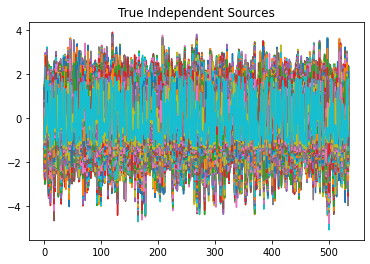

In [ ]:
#Graph displaying original sources from train dataset 
#that have been mixed together
plt.plot(X_train / np.std(X_train))
plt.title("True Independent Sources")

Text(0.5, 1.0, 'ICA recovered signals')

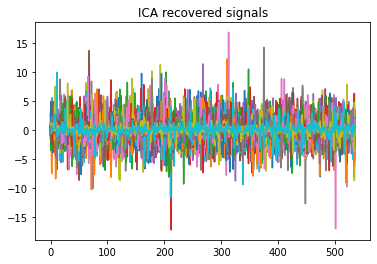

In [ ]:
#Finding directions in the feature space corresponding to projections
X_train_ica = ica.transform(X_train)
plt.plot(X_train_ica / np.std(X_train_ica))
plt.title("ICA recovered signals")

Text(0.5, 1.0, 'True Independent Sources')

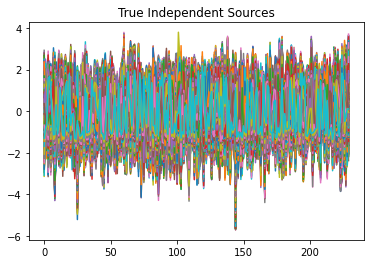

In [ ]:
#Graph displaying original sources from test dataset 
#that have been mixed together
plt.plot(X_test / np.std(X_test))
plt.title("True Independent Sources")

Text(0.5, 1.0, 'ICA recovered signals')

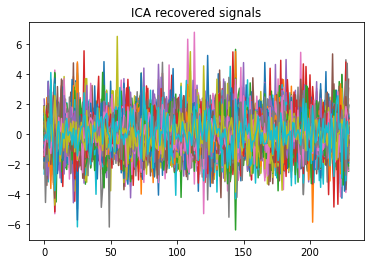

In [ ]:
#Finding directions in the feature space corresponding to projections
X_test_ica = ica.transform(X_test)
plt.plot(X_test_ica / np.std(X_test_ica))
plt.title("ICA recovered signals")

####Model training

In [ ]:
print("Fitting the classifier to the training set")
start_time_t5 = time()
grid_parameters_new = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), grid_parameters_new, n_iter=10
)
clf = clf.fit(X_train_ica, y_train)
print("done in %0.3fs" % (time() - start_time_t5))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 1.173s
Best estimator found by grid search:
SVC(C=2676.5153036644087, class_weight='balanced', gamma=0.00011736106525880768)


Predicting people's names on the test set
done in 0.038s
               precision    recall  f1-score   support

 Colin Powell       0.83      0.92      0.87        71
George W Bush       0.96      0.92      0.94       159

     accuracy                           0.92       230
    macro avg       0.90      0.92      0.91       230
 weighted avg       0.92      0.92      0.92       230



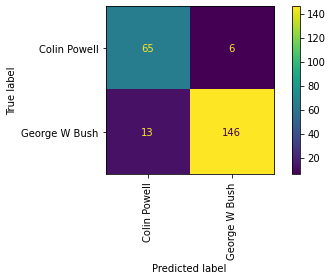

In [ ]:
print("Predicting people's names on the test set")
start_time_t6 = time()
y_pred = clf.predict(X_test_ica)
print("done in %0.3fs" % (time() - start_time_t6))

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_ica, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In [ ]:
#Helper function to plot a gallery of portraits
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure(figsize=(1.8 * cols, 2.4 * rows))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

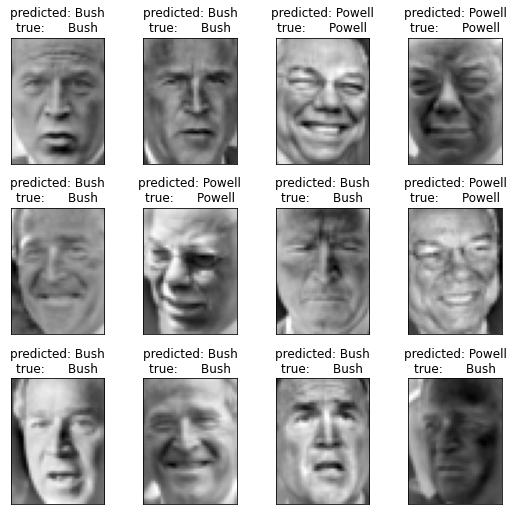

In [ ]:
def title(pred, test, tn, i):
    predicted_name = tn[pred[i]].rsplit(" ", 1)[-1]
    actual_name = tn[test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (predicted_name, actual_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

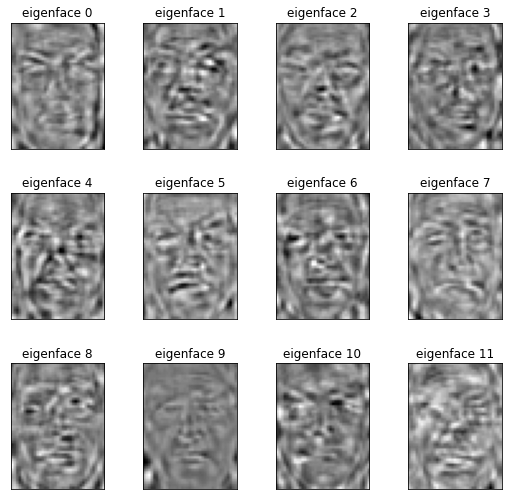

In [ ]:
#Outputting extracted Eigen Faces
eigen_faces = ica.components_.reshape((n_components,h,w))
face_titles = ["eigenface %d" % i for i in range(eigen_faces.shape[0])]
plot_gallery(eigen_faces, face_titles, h, w)

plt.show()